# Projeto 1 - Base de Dados Covid

O objetivo do projeto será desenvolver um estudo no dataset `COVID.csv`, base esta que contém informações sobre casos de COVID. Ou seja a partir do diagnóstico de sintomas e informações dos pacientes deve-se desenvolver um modelo para prever casos confirmados de COVID.

<br>

A descrição das variáveis contidas no dataset pode ser encontradas a seguir:

 - **id**: Identificação do paciente<br>
 - **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher) <br>
 - **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0) <br>
 - **intubed**: Seo paciente foi intubado ou não<br>
 - **pneumonia**: Se o paciente apresentou pneumonia ou não<br>
 - **age**: Idade do Paciente<br>
 - **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
 - **diabetes**: Se o paciente tem diabetes ou não<br>
 - **copd**: Se opaciente tem COPD ou não<br>
 - **asthma**: Se o paciente tem Asma ou não<br>
 - **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
 - **hypertension**: Se o paciente tem hipertensão ou não<br>
 - **ohter_disease**: Se o paciente tem outras doenças ou não<br>
 - **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
 - **obesity**: Se o paciente tem obesidade ou não<br>
 - **renal_chronic**: Se o paciente tem problemas renais ou não<br>
 - **tobacco**: Se o paciente é fumante ou não<br>
 - **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
 - **icu**: Se o paciente precisou ser internado na UTI<br>
 - **covid_res**: Se o resultado do teste foi Positivo ou Negativo<br>
 
PAra ajudar no desenvolvimento do projeto, vamos separar o projeto em algumas seções, conforme descritas a seguir:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

<br>

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informaç~eos sobre as variáveis em si e suas relações com as demais;

<br>

- __Modelagem dos Dados__: Nesta parte, vamos modelar um classificador para os resultados dos exames de COVID (`covid_res`). VocÊs deveram __treinar pelo menos 3 modelos__ (podendo testar mais que 3 também) e de acordo com alguma métrica de avaliação (escolhida por vocÊs), decidir qual será o melhor modelo a ser utilizado!;

<br>

- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

## Critérios de Avaliação

Um processo de análise e modelagem de dados depende de diversos fatores, desde quais sementes aleatórias foram definadas até mesmo o desempenho computacional da máquina utlizada. Dessa forma, __não__ será cobrado que resultados os alunos obteram, mas sim o desenvolvimento do projeto, olhando os seguinte tópicos:

- Desenvolvimento mínimo de cada um dos itens acima;

- Padrozinação de Gráficos, Visualizações e códigos;

- _Clean COde_ e códigos comentados;

- Explicação de todos os processos feitos e decisões tomadas


<br>


## Informações Gerais sobre o Projeto

- O projeto poderá ser desenvolvido __individualmente__ ou em __grupos com até 4 pessoas__, caos façam em grupos enviar a relação de alunos do grupo para o professor;

- Data de Divulgação do Projeto: 29/11/2021;

- Monitoria do Projeto 1: 10/12/2021;

- Data de Entrega: 17/12/2021;

- Entrega: Através do _Class_, será criado um Projeto para a entrega dentro do módulo "_Machine Learning_", Aula "Árvore de Decisão" na aba Exercícios;

<br>

__Padrão de Entrega__ Para a identificação dos alunos que entregaram o projeto, peço para que sigam o padrão de nome para o arquivo enviado conforme as orientações abaixo:

- Para quem realizar __individualmente__: NúmeroDaTurma_Projeto1_NomeDoALuno.ipynb;

- Para quem realizar em __grupos__: NúmeroDaTurma_Projeto1_GrupoX.ipynb;

__Bem Importante:__ Deixem devidamente identificado o número da turma, número do grupo e o nome do aluno ou alunos dentro do Notebook também.

__Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

In [1]:
!pip install plotly

In [2]:
# Bibliotecas utilizadas
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import datetime as dt
from functools import reduce

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('COVID.csv', index_col=None)
df_raw = df.copy()


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499692 entries, 0 to 499691
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           499692 non-null  int64  
 1   sex                  499692 non-null  int64  
 2   patient_type         499692 non-null  int64  
 3   intubed              107424 non-null  float64
 4   pneumonia            499681 non-null  float64
 5   age                  499692 non-null  int64  
 6   pregnancy            245258 non-null  float64
 7   diabetes             498051 non-null  float64
 8   copd                 498246 non-null  float64
 9   asthma               498250 non-null  float64
 10  inmsupr              498030 non-null  float64
 11  hypertension         498203 non-null  float64
 12  other_disease        497499 non-null  float64
 13  cardiovascular       498183 non-null  float64
 14  obesity              498222 non-null  float64
 15  renal_chronic    

In [5]:
df.head()

,Unnamed: 0,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0


In [6]:
#Looking for duplicated rows. No dup rows were found wich is expected as we have an index wich could be names or personal ids instead. Also it is hard to say
#precisely if a row is duplicated since we have more than 400.000 lines of mostly binary features.
#
df.duplicated().value_counts().reset_index()

,index,0
0,False,499692


In [7]:
df["intubed"].unique()

array([nan,  0.,  1.])

In [8]:
# Getting some ideia of the impact of dropping the NaN values of this feature.
df[df["intubed"]==1].value_counts().reset_index()


,Unnamed: 0,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,0
0,79,1,0,1.0,1.0,67,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0.0,1
1,219735,1,0,1.0,1.0,54,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1
2,233444,1,0,1.0,1.0,68,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0.0,1
3,233691,1,0,1.0,1.0,84,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1
4,233725,1,0,1.0,0.0,83,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,110817,1,0,1.0,1.0,46,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0.0,1
2330,110943,1,0,1.0,1.0,57,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1.0,1
2331,111267,1,0,1.0,1.0,58,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1
2332,111350,1,0,1.0,1.0,73,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1


In [9]:
df[df["intubed"]==0].value_counts().reset_index()

,Unnamed: 0,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,0
0,21,1,0,0.0,0.0,25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,1
1,284680,1,0,0.0,1.0,51,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
2,284833,1,0,0.0,0.0,49,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
3,284823,1,0,0.0,0.0,55,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,1
4,284815,1,0,0.0,0.0,38,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18013,128296,1,0,0.0,1.0,8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,1
18014,128324,1,0,0.0,1.0,58,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1
18015,128334,1,0,0.0,1.0,27,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1
18016,128343,1,0,0.0,1.0,46,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1


In [10]:
# this name is a little bit awkward so I`ll rename it even though i`ll probbly drop this column in the future.
df =df.rename(columns = {"Unnamed: 0": "id"})

In [11]:
df.head()

,id,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0


In [12]:
# So I decidad to drop Nan values and check the number of rows I`ll have after that.
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20352 entries, 21 to 499677
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   20352 non-null  int64  
 1   sex                  20352 non-null  int64  
 2   patient_type         20352 non-null  int64  
 3   intubed              20352 non-null  float64
 4   pneumonia            20352 non-null  float64
 5   age                  20352 non-null  int64  
 6   pregnancy            20352 non-null  float64
 7   diabetes             20352 non-null  float64
 8   copd                 20352 non-null  float64
 9   asthma               20352 non-null  float64
 10  inmsupr              20352 non-null  float64
 11  hypertension         20352 non-null  float64
 12  other_disease        20352 non-null  float64
 13  cardiovascular       20352 non-null  float64
 14  obesity              20352 non-null  float64
 15  renal_chronic        20352 non-nul

In [13]:
df.head()

,id,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
21,21,1,0,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
30,30,1,0,0.0,0.0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,0.0
71,71,1,0,0.0,1.0,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
79,79,1,0,1.0,1.0,67,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0.0
93,93,1,0,0.0,1.0,59,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0


In [14]:
#Removing id to plot outliers
df_plot = df.drop(columns = ["id"])


<AxesSubplot:>

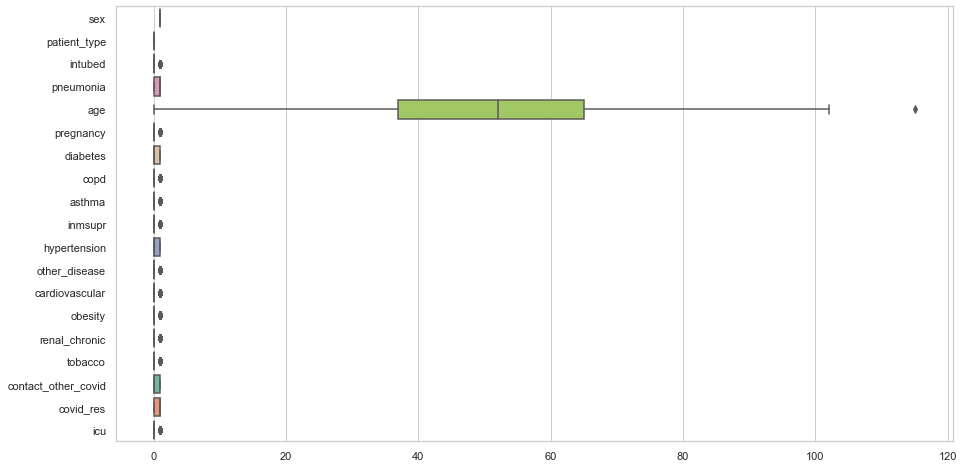

In [15]:
#so, the only column that could contain outliers is age as the other ones are all binary (I hope so...)


sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
sns.boxplot(data=df_plot, orient = "h", palette = "Set2", color ="0.25" )

In [16]:
#Removing outliers
df_in = df_plot
col_name = ["age"]
def calc_min_and_max_range(dados_coluna):
    Q1 = dados_coluna.quantile(q=0.25) # Primeiro quartil
    Q3 = dados_coluna.quantile(q=0.75) # Terceiro quartil

    IQR = Q3 - Q1 # Intervalo interquartílico

    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR

    return inf, sup

for coluna in col_name:
    inf, sup = calc_min_and_max_range(df_in[coluna])
    
    df_in = df_in[(df_in[coluna] > inf) & (df_in[coluna] < sup)]
df_filtered = df_in

<AxesSubplot:>

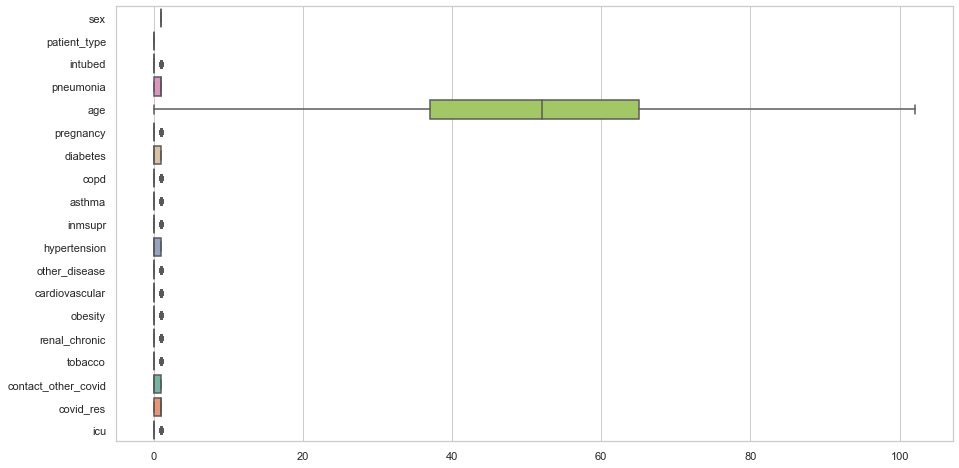

In [17]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
sns.boxplot(data=df_filtered, orient = "h", palette = "Set2", color ="0.25" )

In [18]:
df.nunique()

id                     20352
sex                        1
patient_type               1
intubed                    2
pneumonia                  2
age                      104
pregnancy                  2
diabetes                   2
copd                       2
asthma                     2
inmsupr                    2
hypertension               2
other_disease              2
cardiovascular             2
obesity                    2
renal_chronic              2
tobacco                    2
contact_other_covid        2
covid_res                  2
icu                        2
dtype: int64

In [19]:
# as we can see after removing the Nan values we faced a problem (or not) wich is that the sex and patient_type ended with only one answer each. From now on we will proceed 
# using the dataset without this 2 features.

In [20]:
df_filtered.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
21,1,0,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
30,1,0,0.0,0.0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,0.0
71,1,0,0.0,1.0,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
79,1,0,1.0,1.0,67,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0.0
93,1,0,0.0,1.0,59,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0


In [21]:
df_filtered = df_filtered.drop(columns = ["sex","patient_type"])
df_filtered.head()

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
21,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
30,0.0,0.0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,0.0
71,0.0,1.0,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
79,1.0,1.0,67,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0.0
93,0.0,1.0,59,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0


In [22]:
# At this point I guess we finished the data preparation


- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram análises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informações sobre as variáveis em si e suas relações com as demais;

In [23]:
# Covariance
df_cov= df_filtered.cov()
df_cov

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
intubed,0.101539,0.028206,0.345362,-0.001721,0.009032,0.001795,-0.001252,0.000632,0.008236,0.002718,0.001709,0.006734,0.002850,-0.000095,-0.006120,0.008386,0.043773
pneumonia,0.028206,0.224059,2.277341,-0.007544,0.030403,0.003706,-0.001727,-0.000980,0.032618,-0.000726,0.003533,0.021659,0.004220,0.000349,-0.021143,0.047943,0.017558
age,0.345362,2.277341,431.147837,-0.565514,2.952474,0.913208,-0.072594,-0.209698,4.050892,-0.171558,0.658838,0.941651,0.339153,0.108782,-0.826623,2.071284,-0.046773
pregnancy,-0.001721,-0.007544,-0.565514,0.024247,-0.006043,-0.001089,0.000185,-0.000789,-0.006915,0.000474,-0.001022,-0.002357,-0.001018,-0.000479,-0.003224,-0.003538,-0.000710
diabetes,0.009032,0.030403,2.952474,-0.006043,0.207752,0.007313,0.000440,-0.001198,0.080325,-0.000957,0.010606,0.023763,0.015692,0.001503,-0.018870,0.018761,0.004718
copd,0.001795,0.003706,0.913208,-0.001089,0.007313,0.045483,0.002059,0.001304,0.012514,0.000990,0.005877,0.004061,0.002237,0.003946,-0.004475,-0.004747,0.000285
asthma,-0.001252,-0.001727,-0.072594,0.000185,0.000440,0.002059,0.032894,0.000991,0.001329,0.000099,0.000488,0.003899,-0.000287,0.001073,-0.000018,-0.000904,-0.000561
inmsupr,0.000632,-0.000980,-0.209698,-0.000789,-0.001198,0.001304,0.000991,0.039889,-0.000560,0.008546,0.003168,-0.000171,0.003520,0.000782,-0.001579,-0.008181,0.001990
hypertension,0.008236,0.032618,4.050892,-0.006915,0.080325,0.012514,0.001329,-0.000560,0.220255,0.001547,0.019600,0.034285,0.018205,0.001835,-0.016084,0.018432,0.003486
other_disease,0.002718,-0.000726,-0.171558,0.000474,-0.000957,0.000990,0.000099,0.008546,0.001547,0.044013,0.004885,0.001697,0.002218,0.001463,-0.002509,-0.009744,0.003473


In [24]:
#Pearson`s Correlation
df_corrP = df_filtered.corr()
df_corrP

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
intubed,1.000000,0.187003,0.052197,-0.034694,0.062184,0.026410,-0.021663,0.009930,0.055075,0.040656,0.023538,0.049551,0.041497,-0.001443,-0.041768,0.053408,0.426602
pneumonia,0.187003,1.000000,0.231704,-0.102348,0.140917,0.036709,-0.020114,-0.010370,0.146831,-0.007309,0.032754,0.107280,0.041357,0.003555,-0.097142,0.205554,0.115196
age,0.052197,0.231704,1.000000,-0.174906,0.311961,0.206221,-0.019276,-0.050565,0.415695,-0.039383,0.139250,0.106326,0.075778,0.025282,-0.086579,0.202447,-0.006995
pregnancy,-0.034694,-0.102348,-0.174906,1.000000,-0.085149,-0.032802,0.006559,-0.025375,-0.094622,0.014520,-0.028804,-0.035487,-0.030328,-0.014849,-0.045028,-0.046114,-0.014161
diabetes,0.062184,0.140917,0.311961,-0.085149,1.000000,0.075227,0.005325,-0.013163,0.375502,-0.010007,0.102116,0.122236,0.159724,0.015917,-0.090037,0.083533,0.032145
copd,0.026410,0.036709,0.206221,-0.032802,0.075227,1.000000,0.053232,0.030625,0.125032,0.022132,0.120943,0.044644,0.048666,0.089285,-0.045637,-0.045174,0.004151
asthma,-0.021663,-0.020114,-0.019276,0.006559,0.005325,0.053232,1.000000,0.027345,0.015611,0.002615,0.011807,0.050397,-0.007351,0.028558,-0.000221,-0.010114,-0.009608
inmsupr,0.009930,-0.010370,-0.050565,-0.025375,-0.013163,0.030625,0.027345,1.000000,-0.005974,0.203968,0.069613,-0.002007,0.081765,0.018900,-0.017190,-0.083130,0.030936
hypertension,0.055075,0.146831,0.415695,-0.094622,0.375502,0.125032,0.015611,-0.005974,1.000000,0.015709,0.183280,0.171280,0.179962,0.018865,-0.074533,0.079705,0.023068
other_disease,0.040656,-0.007309,-0.039383,0.014520,-0.010007,0.022132,0.002615,0.203968,0.015709,1.000000,0.102194,0.018962,0.049049,0.033663,-0.026007,-0.094265,0.051412


In [25]:
#Spearman's Correlation
df_corrS = df_filtered.corr(method = 'spearman')
df_corrS

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
intubed,1.000000,0.187003,0.069053,-0.034694,0.062184,0.026410,-0.021663,0.009930,0.055075,0.040656,0.023538,0.049551,0.041497,-0.001443,-0.041768,0.053408,0.426602
pneumonia,0.187003,1.000000,0.234523,-0.102348,0.140917,0.036709,-0.020114,-0.010370,0.146831,-0.007309,0.032754,0.107280,0.041357,0.003555,-0.097142,0.205554,0.115196
age,0.069053,0.234523,1.000000,-0.193562,0.321086,0.215643,-0.024630,-0.035055,0.430715,-0.022105,0.152254,0.089267,0.078428,0.014937,-0.106608,0.179559,0.014549
pregnancy,-0.034694,-0.102348,-0.193562,1.000000,-0.085149,-0.032802,0.006559,-0.025375,-0.094622,0.014520,-0.028804,-0.035487,-0.030328,-0.014849,-0.045028,-0.046114,-0.014161
diabetes,0.062184,0.140917,0.321086,-0.085149,1.000000,0.075227,0.005325,-0.013163,0.375502,-0.010007,0.102116,0.122236,0.159724,0.015917,-0.090037,0.083533,0.032145
copd,0.026410,0.036709,0.215643,-0.032802,0.075227,1.000000,0.053232,0.030625,0.125032,0.022132,0.120943,0.044644,0.048666,0.089285,-0.045637,-0.045174,0.004151
asthma,-0.021663,-0.020114,-0.024630,0.006559,0.005325,0.053232,1.000000,0.027345,0.015611,0.002615,0.011807,0.050397,-0.007351,0.028558,-0.000221,-0.010114,-0.009608
inmsupr,0.009930,-0.010370,-0.035055,-0.025375,-0.013163,0.030625,0.027345,1.000000,-0.005974,0.203968,0.069613,-0.002007,0.081765,0.018900,-0.017190,-0.083130,0.030936
hypertension,0.055075,0.146831,0.430715,-0.094622,0.375502,0.125032,0.015611,-0.005974,1.000000,0.015709,0.183280,0.171280,0.179962,0.018865,-0.074533,0.079705,0.023068
other_disease,0.040656,-0.007309,-0.022105,0.014520,-0.010007,0.022132,0.002615,0.203968,0.015709,1.000000,0.102194,0.018962,0.049049,0.033663,-0.026007,-0.094265,0.051412


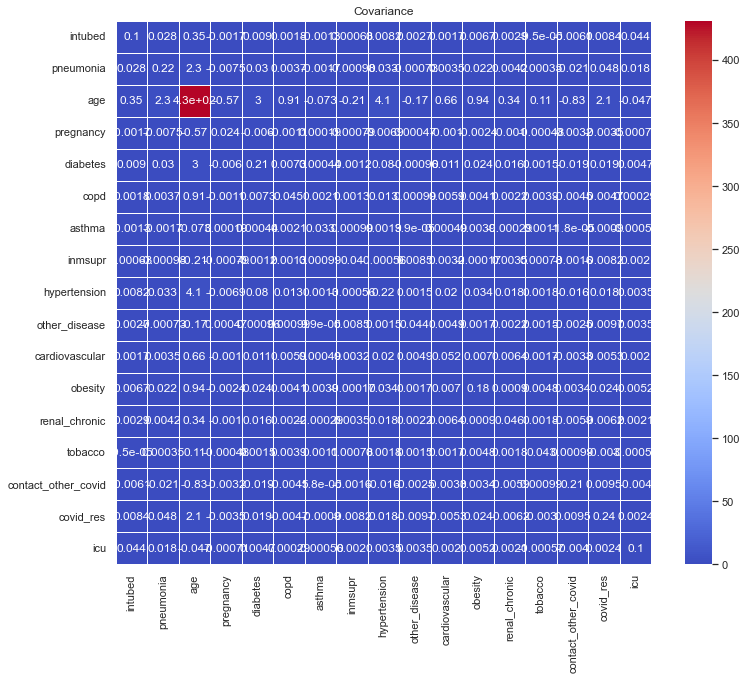

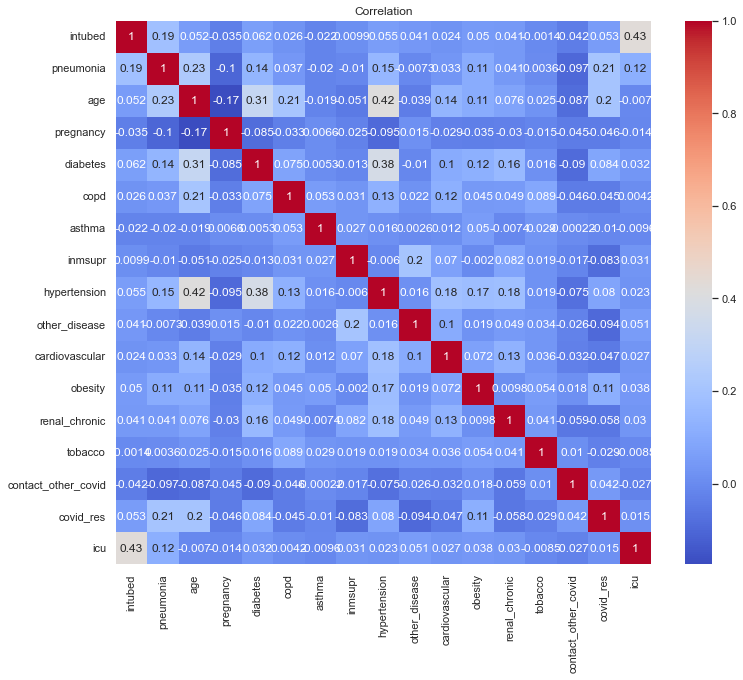

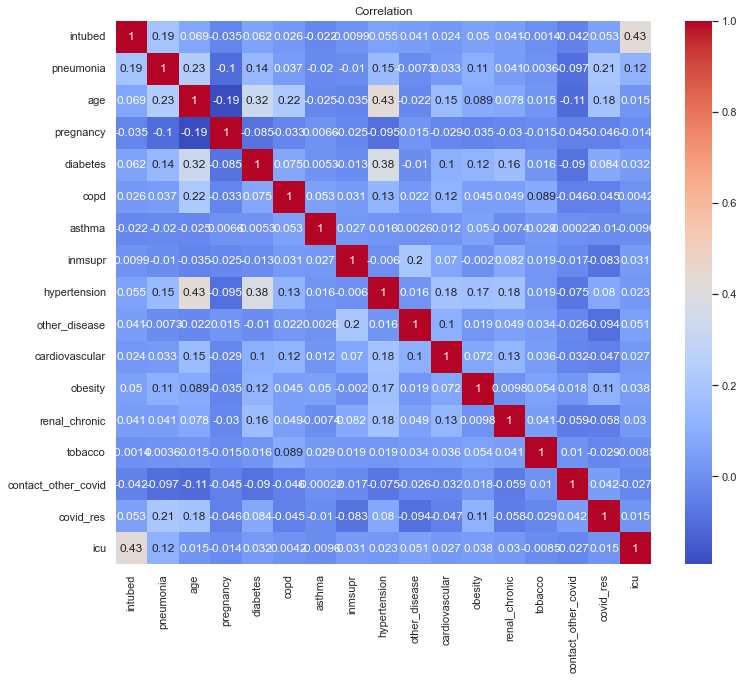

In [26]:
#Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_cov, vmin = 0, linewidths=.5,annot=True, cmap='coolwarm',
        xticklabels=df_cov.columns,
        yticklabels=df_cov.columns)

plt.title('Covariance')
plt.show()


# cria um mapa de cores dos valoes da correlação de Pearson
plt.figure(figsize=(12,10))
sns.heatmap(df_corrP, annot=True,cmap='coolwarm',
        xticklabels=df_corrP.columns,
        yticklabels=df_corrP.columns)

plt.title('Correlation')
plt.show()

# cria um mapa de cores dos valoes da correlação de Spearman
plt.figure(figsize=(12,10))
sns.heatmap(df_corrS, annot=True,cmap='coolwarm',
        xticklabels=df_corrS.columns,
        yticklabels=df_corrS.columns)

plt.title('Correlation')
plt.show()

In [27]:
# Lets take a look on the balance of the dataset.
df = df_filtered

In [28]:
df.head()

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
21,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
30,0.0,0.0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,0.0
71,0.0,1.0,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
79,1.0,1.0,67,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0.0
93,0.0,1.0,59,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0


In [29]:
#Looks ok for now
print(df[df['covid_res']==1].shape)
print(df[df['covid_res']==0].shape)
print("-"*40)
print(df['covid_res'].value_counts())

(11905, 17)
(8446, 17)
----------------------------------------
1    11905
0     8446
Name: covid_res, dtype: int64


In [30]:
df.nunique()

intubed                  2
pneumonia                2
age                    103
pregnancy                2
diabetes                 2
copd                     2
asthma                   2
inmsupr                  2
hypertension             2
other_disease            2
cardiovascular           2
obesity                  2
renal_chronic            2
tobacco                  2
contact_other_covid      2
covid_res                2
icu                      2
dtype: int64

# So now we have the dataset we will work on to create our classifier. It is possible that we should have splited our dataset from the begining of the of the analisys.
# But as it seems to be balanced and stil have lots of rows ,the division will be the next step. I really need to understand if this is possible or I really shoud have splited before # and also treated NaNs and outliers of each of the train/valid/test parts.


- __Modelagem dos Dados__: Nesta parte, vamos modelar um classificador para os resultados dos exames de COVID (`covid_res`). VocÊs deveram __treinar pelo menos 3 modelos__ (podendo testar mais que 3 também) e de acordo com alguma métrica de avaliação (escolhida por vocÊs), decidir qual será o melhor modelo a ser utilizado!;

# The models chosen for this part will be RandomForestClassifier, AdaBoostClassifier and LGBMClassifier

In [31]:
# Importing RandomFOrest Classifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
#Separating my target from the dataset

X = df.drop(['covid_res'], axis=1)
y = df['covid_res']

print(X.shape, y.shape)

(20351, 16) (20351,)


In [33]:
from sklearn.model_selection import train_test_split
# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.75
ratio_val = 0.15
ratio_test = 0.1

# Produces test split.
X_remaining, X_test, y_remaining, y_test = train_test_split(
    X, y, test_size=ratio_test)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
X_train, X_valid, y_train, y_valid = train_test_split(
    X_remaining, y_remaining, test_size=ratio_val_adjusted)



In [34]:
'''#Spliting the dataset into train and validation
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=12)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)'''

'#Spliting the dataset into train and validation\nfrom sklearn.model_selection import train_test_split\n\nX_train, X_valid, y_train, y_valid = train_test_split(X, \n                                                    y, \n                                                    test_size=0.3, \n                                                    random_state=12)\n\nprint(X_train.shape, y_train.shape)\nprint(X_valid.shape, y_valid.shape)'

In [35]:
model = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=12)

model

RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=12)

In [36]:
# Training the model

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=12)

In [37]:
#predictig the target variable
y_train_pred = model.predict(X_train)

y_valid_pred = model.predict(X_valid)

y_test_pred = model.predict(X_test)

print(y_train_pred.shape, y_valid_pred.shape)

(15262,) (3053,)


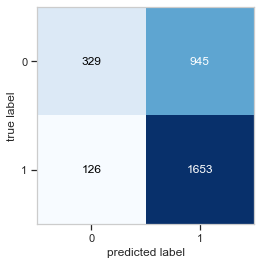

In [38]:
#PLoting confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [39]:
#Printing important metrics to compare with further models
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train_rf = accuracy_score(y_train, y_train_pred)
prec_train_rf = precision_score(y_train, y_train_pred)
rec_train_rf = recall_score(y_train, y_train_pred)

acc_valid_rf = accuracy_score(y_valid, y_valid_pred)
prec_valid_rf = precision_score(y_valid, y_valid_pred)
rec_valid_rf = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train_rf:.2f}, Precision: {prec_train_rf:.2f}, Recall: {rec_train_rf:.2f}')
print(f'Validação:\nAcc: {acc_valid_rf:.2f}, Precision: {prec_valid_rf:.2f}, Recall: {rec_valid_rf:.2f}')

Treino:
Acc: 0.65, Precision: 0.64, Recall: 0.93
Validação:
Acc: 0.65, Precision: 0.64, Recall: 0.93


In [40]:
features_rf = model.feature_importances_
features_rf


array([1.29775066e-02, 2.50822624e-01, 3.85517565e-01, 5.64939305e-03,
       4.85816812e-02, 8.91980056e-03, 1.56184880e-04, 4.07152153e-02,
       3.34266672e-02, 8.18017447e-02, 5.70305796e-03, 1.03098477e-01,
       1.38930272e-02, 1.20330338e-03, 7.35685689e-03, 1.76895441e-04])

In [41]:
# Using AdaBoostClassifier

In [42]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
model_2 = AdaBoostClassifier(n_estimators=20, random_state=12)

model_2

AdaBoostClassifier(n_estimators=20, random_state=12)

In [44]:
# Training model

model_2.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=20, random_state=12)

In [45]:
y_train_pred = model_2.predict(X_train)

y_valid_pred = model_2.predict(X_valid)

print(y_train_pred.shape, y_valid_pred.shape)

(15262,) (3053,)


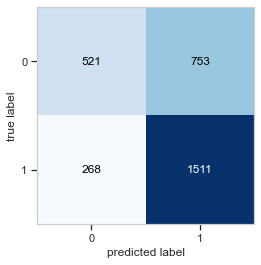

In [46]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [47]:
#Printing important metrics to compare with further models
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train_ab = accuracy_score(y_train, y_train_pred)
prec_train_ab = precision_score(y_train, y_train_pred)
rec_train_ab = recall_score(y_train, y_train_pred)

acc_valid_ab = accuracy_score(y_valid, y_valid_pred)
prec_valid_ab = precision_score(y_valid, y_valid_pred)
rec_valid_ab = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train_ab:.2f}, Precision: {prec_train_ab:.2f}, Recall: {rec_train_ab:.2f}')
print(f'Validação:\nAcc: {acc_valid_ab:.2f}, Precision: {prec_valid_ab:.2f}, Recall: {rec_valid_ab:.2f}')

Treino:
Acc: 0.67, Precision: 0.67, Recall: 0.84
Validação:
Acc: 0.67, Precision: 0.67, Recall: 0.85


In [48]:
features_ab = model_2.feature_importances_
features_ab

array([0.05, 0.05, 0.5 , 0.  , 0.  , 0.05, 0.  , 0.05, 0.  , 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.  ])

In [49]:
# Using LightGBMClassifier

In [50]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [51]:
from lightgbm import LGBMClassifier

In [52]:
model_3 = LGBMClassifier(n_estimators=50, max_depth=7, learning_rate=0.1, is_unbalance=True, importance_type='gain', randmom_state=12)

model_3

LGBMClassifier(importance_type='gain', is_unbalance=True, max_depth=7,
               n_estimators=50, randmom_state=12)

In [53]:
# Training Model

model_3.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: randmom_state


LGBMClassifier(importance_type='gain', is_unbalance=True, max_depth=7,
               n_estimators=50, randmom_state=12)

In [54]:
y_train_pred = model_3.predict(X_train)

y_valid_pred = model_3.predict(X_valid)

y_test_pred = model_3.predict(X_test)

print(y_train_pred.shape, y_valid_pred.shape)

(15262,) (3053,)


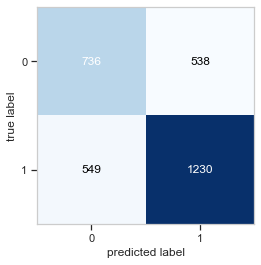

In [55]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train_lgbm = accuracy_score(y_train, y_train_pred)
prec_train_lgbm = precision_score(y_train, y_train_pred)
rec_train_lgbm = recall_score(y_train, y_train_pred)

acc_valid_lgbm = accuracy_score(y_valid, y_valid_pred)
prec_valid_lgbm = precision_score(y_valid, y_valid_pred)
rec_valid_lgbm = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train_lgbm:.2f}, Precision: {prec_train_lgbm:.2f}, Recall: {rec_train_lgbm:.2f}')
print(f'Validação:\nAcc: {acc_valid_lgbm:.2f}, Precision: {prec_valid_lgbm:.2f}, Recall: {rec_valid_lgbm:.2f}')

Treino:
Acc: 0.69, Precision: 0.74, Recall: 0.72
Validação:
Acc: 0.64, Precision: 0.70, Recall: 0.69


In [57]:
features_lgbm =model_3.feature_importances_
features_lgbm

array([ 370.77010536, 2604.59135145, 9488.65484327,  116.70185947,
        318.59159648,  557.92295742,  103.00273001,  500.80721802,
        171.21168029,  740.93843025,  373.55033898,  599.74541056,
        657.21615541,  211.33476359,  874.10035706,  241.89363885])

In [58]:
## COmparing the models

print("RandomForest Results")
print(f'Treino:\nAcc: {acc_train_rf:.2f}, Precision: {prec_train_rf:.2f}, Recall: {rec_train_rf:.2f}')
print(f'Validação:\nAcc: {acc_valid_rf:.2f}, Precision: {prec_valid_rf:.2f}, Recall: {rec_valid_rf:.2f}')
print("-"*40)
print("AdaBoost Results")
print(f'Treino:\nAcc: {acc_train_ab:.2f}, Precision: {prec_train_ab:.2f}, Recall: {rec_train_ab:.2f}')
print(f'Validação:\nAcc: {acc_valid_ab:.2f}, Precision: {prec_valid_ab:.2f}, Recall: {rec_valid_ab:.2f}')
print("-"*40)
print("LightGBM Results")
print(f'Treino:\nAcc: {acc_train_lgbm:.2f}, Precision: {prec_train_lgbm:.2f}, Recall: {rec_train_lgbm:.2f}')
print(f'Validação:\nAcc: {acc_valid_lgbm:.2f}, Precision: {prec_valid_lgbm:.2f}, Recall: {rec_valid_lgbm:.2f}')

RandomForest Results
Treino:
Acc: 0.65, Precision: 0.64, Recall: 0.93
Validação:
Acc: 0.65, Precision: 0.64, Recall: 0.93
----------------------------------------
AdaBoost Results
Treino:
Acc: 0.67, Precision: 0.67, Recall: 0.84
Validação:
Acc: 0.67, Precision: 0.67, Recall: 0.85
----------------------------------------
LightGBM Results
Treino:
Acc: 0.69, Precision: 0.74, Recall: 0.72
Validação:
Acc: 0.64, Precision: 0.70, Recall: 0.69


- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

In [59]:
# We will start our optimization running a feature selection algorithm called Boruta.

In [60]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [61]:
#Creating a RandomForest to use on boruta's feature selection
borutaforest = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=12)
# Training the model
borutaforest.fit(X_train, y_train)
#predictig the target variable
y_train_pred = borutaforest.predict(X_train)

y_valid_pred = borutaforest.predict(X_valid)

print(y_train_pred.shape, y_valid_pred.shape)
#Printing important metrics to compare with further models
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train_bf = accuracy_score(y_train, y_train_pred)
prec_train_bf = precision_score(y_train, y_train_pred)
rec_train_bf = recall_score(y_train, y_train_pred)

acc_valid_bf = accuracy_score(y_valid, y_valid_pred)
prec_valid_bf = precision_score(y_valid, y_valid_pred)
rec_valid_bf = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train_bf:.2f}, Precision: {prec_train_bf:.2f}, Recall: {rec_train_bf:.2f}')
print(f'Validação:\nAcc: {acc_valid_bf:.2f}, Precision: {prec_valid_bf:.2f}, Recall: {rec_valid_bf:.2f}')

(15262,) (3053,)
Treino:
Acc: 0.67, Precision: 0.66, Recall: 0.90
Validação:
Acc: 0.66, Precision: 0.65, Recall: 0.89


In [62]:
from boruta import BorutaPy

In [63]:
feat_selector = BorutaPy(borutaforest, n_estimators='auto',  random_state=12)

feat_selector.fit(X_train.values, y_train.values)

feat_selector.support_

array([False,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True, False])

In [64]:
feat_selector.ranking_

array([2, 1, 1, 4, 1, 1, 7, 1, 1, 1, 3, 1, 1, 5, 1, 6])

In [65]:
X_filtered = feat_selector.transform(X.values)
X_filtered

array([[ 0., 25.,  0., ...,  0.,  0.,  1.],
       [ 0., 52.,  0., ...,  1.,  0.,  1.],
       [ 1., 51.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0., 23.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., 55.,  0., ...,  1.,  0.,  0.]])

In [66]:
feature_names = ['intubed','pneumonia', 'age', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
                 'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid', ]

In [67]:
feature_ranks = list(zip(feature_names, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

In [68]:
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: intubed                   Rank: 2,  Keep: False
Feature: pneumonia                 Rank: 1,  Keep: True
Feature: age                       Rank: 1,  Keep: True
Feature: diabetes                  Rank: 4,  Keep: False
Feature: copd                      Rank: 1,  Keep: True
Feature: asthma                    Rank: 1,  Keep: True
Feature: inmsupr                   Rank: 7,  Keep: False
Feature: hypertension              Rank: 1,  Keep: True
Feature: other_disease             Rank: 1,  Keep: True
Feature: cardiovascular            Rank: 1,  Keep: True
Feature: obesity                   Rank: 3,  Keep: False
Feature: renal_chronic             Rank: 1,  Keep: True
Feature: tobacco                   Rank: 1,  Keep: True
Feature: contact_other_covid       Rank: 5,  Keep: False


In [69]:
green_area = X.columns[feat_selector.support_].to_list()
blue_area = X.columns[feat_selector.support_weak_].to_list()
print(green_area)
print(blue_area)

['pneumonia', 'age', 'diabetes', 'copd', 'inmsupr', 'hypertension', 'other_disease', 'obesity', 'renal_chronic', 'contact_other_covid']
[]


In [70]:
df.head()

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
21,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
30,0.0,0.0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,0.0
71,0.0,1.0,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
79,1.0,1.0,67,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0.0
93,0.0,1.0,59,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0


In [71]:
#Dropping the features that boruta considered as not usefull/weak for the algorithm. Lets see if the result will be optimized...
df_fs = df.drop(columns = ["intubed", "pregnancy", "asthma", "cardiovascular", "tobacco", "contact_other_covid"])

In [72]:
df_fs.head()

,pneumonia,age,diabetes,copd,inmsupr,hypertension,other_disease,obesity,renal_chronic,covid_res,icu
21,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
30,0.0,52,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0
71,1.0,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
79,1.0,67,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0.0
93,1.0,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0


In [73]:
#Separating my target from the dataset

X = df_fs.drop(['covid_res'], axis=1)
y = df_fs['covid_res']

print(X.shape, y.shape)

(20351, 10) (20351,)


In [74]:
from sklearn.model_selection import train_test_split
# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.75
ratio_val = 0.15
ratio_test = 0.1

# Produces test split.
X_remaining, X_test, y_remaining, y_test = train_test_split(
    X, y, test_size=ratio_test)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
X_train, X_valid, y_train, y_valid = train_test_split(
    X_remaining, y_remaining, test_size=ratio_val_adjusted)

In [75]:
from lightgbm import LGBMClassifier

In [76]:
model_lgbm = LGBMClassifier(n_estimators=50, max_depth=7, learning_rate=0.1, is_unbalance=True, importance_type='gain')

model_lgbm

LGBMClassifier(importance_type='gain', is_unbalance=True, max_depth=7,
               n_estimators=50)

In [77]:
# Training Model

model_lgbm.fit(X_train, y_train)

LGBMClassifier(importance_type='gain', is_unbalance=True, max_depth=7,
               n_estimators=50)

In [78]:
y_train_pred = model_lgbm.predict(X_train)

y_valid_pred = model_lgbm.predict(X_valid)

print(y_train_pred.shape, y_valid_pred.shape)

(15262,) (3053,)


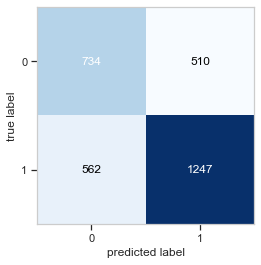

In [79]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train_lgbm_fs = accuracy_score(y_train, y_train_pred)
prec_train_lgbm_fs = precision_score(y_train, y_train_pred)
rec_train_lgbm_fs = recall_score(y_train, y_train_pred)

acc_valid_lgbm_fs = accuracy_score(y_valid, y_valid_pred)
prec_valid_lgbm_fs = precision_score(y_valid, y_valid_pred)
rec_valid_lgbm_fs = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train_lgbm_fs:.2f}, Precision: {prec_train_lgbm_fs:.2f}, Recall: {rec_train_lgbm_fs:.2f}')
print(f'Validação:\nAcc: {acc_valid_lgbm_fs:.2f}, Precision: {prec_valid_lgbm_fs:.2f}, Recall: {rec_valid_lgbm_fs:.2f}')

Treino:
Acc: 0.67, Precision: 0.73, Recall: 0.70
Validação:
Acc: 0.65, Precision: 0.71, Recall: 0.69


In [81]:
## COmparing the models

print("RandomForest Results")
print(f'Treino:\nAcc: {acc_train_rf:.2f}, Precision: {prec_train_rf:.2f}, Recall: {rec_train_rf:.2f}')
print(f'Validação:\nAcc: {acc_valid_rf:.2f}, Precision: {prec_valid_rf:.2f}, Recall: {rec_valid_rf:.2f}')
print("-"*40)
print("BorutaForest Results")
print(f'Treino:\nAcc: {acc_train_bf:.2f}, Precision: {prec_train_bf:.2f}, Recall: {rec_train_bf:.2f}')
print(f'Validação:\nAcc: {acc_valid_bf:.2f}, Precision: {prec_valid_bf:.2f}, Recall: {rec_valid_bf:.2f}')
print("-"*40)
print("AdaBoost Results")
print(f'Treino:\nAcc: {acc_train_ab:.2f}, Precision: {prec_train_ab:.2f}, Recall: {rec_train_ab:.2f}')
print(f'Validação:\nAcc: {acc_valid_ab:.2f}, Precision: {prec_valid_ab:.2f}, Recall: {rec_valid_ab:.2f}')
print("-"*40)
print("LightGBM Results")
print(f'Treino:\nAcc: {acc_train_lgbm:.2f}, Precision: {prec_train_lgbm:.2f}, Recall: {rec_train_lgbm:.2f}')
print(f'Validação:\nAcc: {acc_valid_lgbm:.2f}, Precision: {prec_valid_lgbm:.2f}, Recall: {rec_valid_lgbm:.2f}')
print("-"*40)
print("LightGBM_FS Results")
print(f'Treino:\nAcc: {acc_train_lgbm_fs:.2f}, Precision: {prec_train_lgbm_fs:.2f}, Recall: {rec_train_lgbm_fs:.2f}')
print(f'Validação:\nAcc: {acc_valid_lgbm_fs:.2f}, Precision: {prec_valid_lgbm_fs:.2f}, Recall: {rec_valid_lgbm_fs:.2f}')

RandomForest Results
Treino:
Acc: 0.65, Precision: 0.64, Recall: 0.93
Validação:
Acc: 0.65, Precision: 0.64, Recall: 0.93
----------------------------------------
BorutaForest Results
Treino:
Acc: 0.67, Precision: 0.66, Recall: 0.90
Validação:
Acc: 0.66, Precision: 0.65, Recall: 0.89
----------------------------------------
AdaBoost Results
Treino:
Acc: 0.67, Precision: 0.67, Recall: 0.84
Validação:
Acc: 0.67, Precision: 0.67, Recall: 0.85
----------------------------------------
LightGBM Results
Treino:
Acc: 0.69, Precision: 0.74, Recall: 0.72
Validação:
Acc: 0.64, Precision: 0.70, Recall: 0.69
----------------------------------------
LightGBM_FS Results
Treino:
Acc: 0.67, Precision: 0.73, Recall: 0.70
Validação:
Acc: 0.65, Precision: 0.71, Recall: 0.69


In [82]:
#So, the result i`ve got here is worse than with all the features. So from now one we wil use the complete dataset and try to change the hyperparams.


In [83]:
df.head()

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
21,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
30,0.0,0.0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,0.0
71,0.0,1.0,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0
79,1.0,1.0,67,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0.0
93,0.0,1.0,59,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0


In [84]:
#Separating my target from the dataset

X = df.drop(['covid_res'], axis=1)
y = df['covid_res']

print(X.shape, y.shape)

(20351, 16) (20351,)


In [85]:
from sklearn.model_selection import train_test_split
# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.75
ratio_val = 0.15
ratio_test = 0.1

# Produces test split.
X_remaining, X_test, y_remaining, y_test = train_test_split(
    X, y, test_size=ratio_test)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
X_train, X_valid, y_train, y_valid = train_test_split(
    X_remaining, y_remaining, test_size=ratio_val_adjusted)

In [86]:
# to optimize the model viryng the hyperparams I`ll use gridsearch.

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
#First lgbm model hyperparams:
'''model_3 = LGBMClassifier(n_estimators=50, 
                            max_depth=7, 
                            learning_rate=0.1, 
                            is_unbalance=True,
                            importance_type='gain')'''

"model_3 = LGBMClassifier(n_estimators=50, \n                            max_depth=7, \n                            learning_rate=0.1, \n                            is_unbalance=True,\n                            importance_type='gain')"

In [89]:
'''model_gs = LGBMClassifier()

parameters = {
    'max_depth': [1,2,3, 4, 5, 6, 7,8],
    'n_estimators': [140, 150,155,160,200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'is_unbalance': [True, False],
    'random_state': [12]
}

clf = GridSearchCV(model_3, parameters, verbose=3, scoring='accuracy')

clf.fit(X_train, y_train)'''

"model_gs = LGBMClassifier()\n\nparameters = {\n    'max_depth': [1,2,3, 4, 5, 6, 7,8],\n    'n_estimators': [140, 150,155,160,200],\n    'learning_rate': [0.01, 0.1, 0.5, 1],\n    'is_unbalance': [True, False],\n    'random_state': [12]\n}\n\nclf = GridSearchCV(model_3, parameters, verbose=3, scoring='accuracy')\n\nclf.fit(X_train, y_train)"

In [90]:
'''clf.best_params_

{'is_unbalance': False,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 160,
 'random_state': 12}'''

"clf.best_params_\n\n{'is_unbalance': False,\n 'learning_rate': 0.1,\n 'max_depth': 2,\n 'n_estimators': 160,\n 'random_state': 12}"

[LightGBM] [Warning] Unknown parameter: randmom_state
(15262,) (3053,)


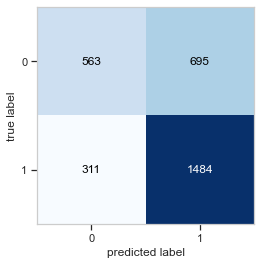

Treino:
Acc: 0.68, Precision: 0.68, Recall: 0.84
Validação:
Acc: 0.67, Precision: 0.68, Recall: 0.83


In [91]:
#Create a model with the optimized hyperparams to see if it is better.
model_4 = LGBMClassifier(n_estimators=160, max_depth=2, learning_rate=0.1, is_unbalance=False, importance_type='gain', randmom_state=12)

# Training Model
model_4.fit(X_train, y_train)

y_train_pred = model_4.predict(X_train)

y_valid_pred = model_4.predict(X_valid)

y_test_pred = model_4.predict(X_test)

print(y_train_pred.shape, y_valid_pred.shape)

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train_lgbm_gs = accuracy_score(y_train, y_train_pred)
prec_train_lgbm_gs = precision_score(y_train, y_train_pred)
rec_train_lgbm_gs = recall_score(y_train, y_train_pred)

acc_valid_lgbm_gs = accuracy_score(y_valid, y_valid_pred)
prec_valid_lgbm_gs = precision_score(y_valid, y_valid_pred)
rec_valid_lgbm_gs = recall_score(y_valid, y_valid_pred)

acc_test_lgbm_gs = accuracy_score(y_test, y_test_pred)
prec_test_lgbm_gs = precision_score(y_test, y_test_pred)
rec_test_lgbm_gs = recall_score(y_test, y_test_pred)


print(f'Treino:\nAcc: {acc_train_lgbm_gs:.2f}, Precision: {prec_train_lgbm_gs:.2f}, Recall: {rec_train_lgbm_gs:.2f}')
print(f'Validação:\nAcc: {acc_valid_lgbm_gs:.2f}, Precision: {prec_valid_lgbm_gs:.2f}, Recall: {rec_valid_lgbm_gs:.2f}')

In [92]:
## COmparing the models

print("RandomForest Results")
print(f'Treino:\nAcc: {acc_train_rf:.2f}, Precision: {prec_train_rf:.2f}, Recall: {rec_train_rf:.2f}')
print(f'Validação:\nAcc: {acc_valid_rf:.2f}, Precision: {prec_valid_rf:.2f}, Recall: {rec_valid_rf:.2f}')
print("-"*40)
print("BorutaForest Results")
print(f'Treino:\nAcc: {acc_train_bf:.2f}, Precision: {prec_train_bf:.2f}, Recall: {rec_train_bf:.2f}')
print(f'Validação:\nAcc: {acc_valid_bf:.2f}, Precision: {prec_valid_bf:.2f}, Recall: {rec_valid_bf:.2f}')
print("-"*40)
print("AdaBoost Results")
print(f'Treino:\nAcc: {acc_train_ab:.2f}, Precision: {prec_train_ab:.2f}, Recall: {rec_train_ab:.2f}')
print(f'Validação:\nAcc: {acc_valid_ab:.2f}, Precision: {prec_valid_ab:.2f}, Recall: {rec_valid_ab:.2f}')
print("-"*40)
print("LightGBM Results")
print(f'Treino:\nAcc: {acc_train_lgbm:.2f}, Precision: {prec_train_lgbm:.2f}, Recall: {rec_train_lgbm:.2f}')
print(f'Validação:\nAcc: {acc_valid_lgbm:.2f}, Precision: {prec_valid_lgbm:.2f}, Recall: {rec_valid_lgbm:.2f}')
print("-"*40)
print("LightGBM_FS Results")
print(f'Treino:\nAcc: {acc_train_lgbm_fs:.2f}, Precision: {prec_train_lgbm_fs:.2f}, Recall: {rec_train_lgbm_fs:.2f}')
print(f'Validação:\nAcc: {acc_valid_lgbm_fs:.2f}, Precision: {prec_valid_lgbm_fs:.2f}, Recall: {rec_valid_lgbm_fs:.2f}')
print("-"*40)
print("LightGBM_GS Results")
print(f'Treino:\nAcc: {acc_train_lgbm_gs:.2f}, Precision: {prec_train_lgbm_gs:.2f}, Recall: {rec_train_lgbm_gs:.2f}')
print(f'Validação:\nAcc: {acc_valid_lgbm_gs:.2f}, Precision: {prec_valid_lgbm_gs:.2f}, Recall: {rec_valid_lgbm_gs:.2f}')

RandomForest Results
Treino:
Acc: 0.65, Precision: 0.64, Recall: 0.93
Validação:
Acc: 0.65, Precision: 0.64, Recall: 0.93
----------------------------------------
BorutaForest Results
Treino:
Acc: 0.67, Precision: 0.66, Recall: 0.90
Validação:
Acc: 0.66, Precision: 0.65, Recall: 0.89
----------------------------------------
AdaBoost Results
Treino:
Acc: 0.67, Precision: 0.67, Recall: 0.84
Validação:
Acc: 0.67, Precision: 0.67, Recall: 0.85
----------------------------------------
LightGBM Results
Treino:
Acc: 0.69, Precision: 0.74, Recall: 0.72
Validação:
Acc: 0.64, Precision: 0.70, Recall: 0.69
----------------------------------------
LightGBM_FS Results
Treino:
Acc: 0.67, Precision: 0.73, Recall: 0.70
Validação:
Acc: 0.65, Precision: 0.71, Recall: 0.69
----------------------------------------
LightGBM_GS Results
Treino:
Acc: 0.68, Precision: 0.68, Recall: 0.84
Validação:
Acc: 0.67, Precision: 0.68, Recall: 0.83


In [93]:
#Now just for fun I`ll use gridsearch with the randomForest model (wich had a very high recall) to see if we can boost it and get a better final model)

In [94]:
#First model hyperparams
'''model = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=12)'''

'model = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=12)'

In [95]:
'''model_gs_rf = RandomForestClassifier()

parameters = {
    'max_depth': [1,2,3,4,5,6,7],
    'min_samples_leaf' : [1,2,3,4,5],
    'n_estimators': [20,40,100,200,500,700,1000],
    
    
    'random_state': [12]
}

clf = GridSearchCV(model_gs_rf, parameters, verbose=3, scoring='accuracy')

clf.fit(X_train, y_train)'''

"model_gs_rf = RandomForestClassifier()\n\nparameters = {\n    'max_depth': [1,2,3,4,5,6,7],\n    'min_samples_leaf' : [1,2,3,4,5],\n    'n_estimators': [20,40,100,200,500,700,1000],\n    \n    \n    'random_state': [12]\n}\n\nclf = GridSearchCV(model_gs_rf, parameters, verbose=3, scoring='accuracy')\n\nclf.fit(X_train, y_train)"

In [96]:
'''clf.best_params_
{'max_depth': 7,
 'min_samples_leaf': 1,
 'n_estimators': 700,
 'random_state': 12}'''

"clf.best_params_\n{'max_depth': 7,\n 'min_samples_leaf': 1,\n 'n_estimators': 700,\n 'random_state': 12}"

In [97]:
#Create a model with the optimized hyperparams to see if it is better.
model_gs_rf1 = RandomForestClassifier(n_estimators=700, max_depth=7, min_samples_leaf=1,random_state=12)

# Training the model

model_gs_rf1.fit(X_train, y_train)
#predictig the target variable
y_train_pred = model_gs_rf1.predict(X_train)

y_valid_pred = model_gs_rf1.predict(X_valid)

y_test_pred = model_gs_rf1.predict(X_test)

print(y_train_pred.shape, y_valid_pred.shape)

#Printing important metrics to compare with further models
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train_rf_gs = accuracy_score(y_train, y_train_pred)
prec_train_rf_gs = precision_score(y_train, y_train_pred)
rec_train_rf_gs = recall_score(y_train, y_train_pred)

acc_valid_rf_gs = accuracy_score(y_valid, y_valid_pred)
prec_valid_rf_gs = precision_score(y_valid, y_valid_pred)
rec_valid_rf_gs = recall_score(y_valid, y_valid_pred)

acc_test_rf_gs = accuracy_score(y_test, y_test_pred)
prec_test_rf_gs = precision_score(y_test, y_test_pred)
rec_test_rf_gs = recall_score(y_test, y_test_pred)



print(f'Treino:\nAcc: {acc_train_rf_gs:.2f}, Precision: {prec_train_rf_gs:.2f}, Recall: {rec_train_rf_gs:.2f}')
print(f'Validação:\nAcc: {acc_valid_rf_gs:.2f}, Precision: {prec_valid_rf_gs:.2f}, Recall: {rec_valid_rf_gs:.2f}')

(15262,) (3053,)
Treino:
Acc: 0.69, Precision: 0.68, Recall: 0.87
Validação:
Acc: 0.67, Precision: 0.67, Recall: 0.86


In [98]:
## COmparing the models
print("RandomForest Results")
print(f'Treino:\nAcc: {acc_train_rf:.2f}, Precision: {prec_train_rf:.2f}, Recall: {rec_train_rf:.2f}')
print(f'Validação:\nAcc: {acc_valid_rf:.2f}, Precision: {prec_valid_rf:.2f}, Recall: {rec_valid_rf:.2f}')
print("-"*40)
print("BorutaForest Results")
print(f'Treino:\nAcc: {acc_train_bf:.2f}, Precision: {prec_train_bf:.2f}, Recall: {rec_train_bf:.2f}')
print(f'Validação:\nAcc: {acc_valid_bf:.2f}, Precision: {prec_valid_bf:.2f}, Recall: {rec_valid_bf:.2f}')
print("-"*40)
print("AdaBoost Results")
print(f'Treino:\nAcc: {acc_train_ab:.2f}, Precision: {prec_train_ab:.2f}, Recall: {rec_train_ab:.2f}')
print(f'Validação:\nAcc: {acc_valid_ab:.2f}, Precision: {prec_valid_ab:.2f}, Recall: {rec_valid_ab:.2f}')
print("-"*40)
print("LightGBM Results")
print(f'Treino:\nAcc: {acc_train_lgbm:.2f}, Precision: {prec_train_lgbm:.2f}, Recall: {rec_train_lgbm:.2f}')
print(f'Validação:\nAcc: {acc_valid_lgbm:.2f}, Precision: {prec_valid_lgbm:.2f}, Recall: {rec_valid_lgbm:.2f}')
print("-"*40)
print("LightGBM_FS Results")
print(f'Treino:\nAcc: {acc_train_lgbm_fs:.2f}, Precision: {prec_train_lgbm_fs:.2f}, Recall: {rec_train_lgbm_fs:.2f}')
print(f'Validação:\nAcc: {acc_valid_lgbm_fs:.2f}, Precision: {prec_valid_lgbm_fs:.2f}, Recall: {rec_valid_lgbm_fs:.2f}')
print("-"*40)
print("LightGBM_GS Results")
print(f'Treino:\nAcc: {acc_train_lgbm_gs:.2f}, Precision: {prec_train_lgbm_gs:.2f}, Recall: {rec_train_lgbm_gs:.2f}')
print(f'Validação:\nAcc: {acc_valid_lgbm_gs:.2f}, Precision: {prec_valid_lgbm_gs:.2f}, Recall: {rec_valid_lgbm_gs:.2f}')
print("-"*40)
print("RandomForest GridSearch")
print(f'Treino:\nAcc: {acc_train_rf_gs:.2f}, Precision: {prec_train_rf_gs:.2f}, Recall: {rec_train_rf_gs:.2f}')
print(f'Validação:\nAcc: {acc_valid_rf_gs:.2f}, Precision: {prec_valid_rf_gs:.2f}, Recall: {rec_valid_rf_gs:.2f}')

RandomForest Results
Treino:
Acc: 0.65, Precision: 0.64, Recall: 0.93
Validação:
Acc: 0.65, Precision: 0.64, Recall: 0.93
----------------------------------------
BorutaForest Results
Treino:
Acc: 0.67, Precision: 0.66, Recall: 0.90
Validação:
Acc: 0.66, Precision: 0.65, Recall: 0.89
----------------------------------------
AdaBoost Results
Treino:
Acc: 0.67, Precision: 0.67, Recall: 0.84
Validação:
Acc: 0.67, Precision: 0.67, Recall: 0.85
----------------------------------------
LightGBM Results
Treino:
Acc: 0.69, Precision: 0.74, Recall: 0.72
Validação:
Acc: 0.64, Precision: 0.70, Recall: 0.69
----------------------------------------
LightGBM_FS Results
Treino:
Acc: 0.67, Precision: 0.73, Recall: 0.70
Validação:
Acc: 0.65, Precision: 0.71, Recall: 0.69
----------------------------------------
LightGBM_GS Results
Treino:
Acc: 0.68, Precision: 0.68, Recall: 0.84
Validação:
Acc: 0.67, Precision: 0.68, Recall: 0.83
----------------------------------------
RandomForest GridSearch
Treino:


- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

In [99]:
#Now i`m going to use the predict_proba function to plot a graphic that shows us the results obtained with different points of cut.

In [100]:
model_4.predict_proba(X_valid)[:,1]

array([0.66341055, 0.47019309, 0.7681374 , ..., 0.34807159, 0.74284027,
       0.52953497])

In [101]:
model_gs_rf1.predict_proba(X_valid)[:,1]

array([0.68388857, 0.48710864, 0.73309695, ..., 0.32536385, 0.71399575,
       0.61740674])

In [102]:
proba_4 = pd.DataFrame(model_4.predict_proba(X_valid)[:,1], columns = ['proba_4'])
proba_gs_rf1 = pd.DataFrame(model_gs_rf1.predict_proba(X_valid)[:,1], columns = ['proba_gs_rf1'])
print(proba_4.shape)
print(proba_gs_rf1.shape)

(3053, 1)
(3053, 1)


In [103]:
y_proba = y_valid.copy()
y_proba = pd.DataFrame(y_proba, columns = ['covid_res'])
y_proba = y_proba.reset_index()

In [104]:
df_probs = pd.concat([ y_proba,proba_4,proba_gs_rf1 ], ignore_index=False,axis=1 ,join='outer')

df_probs=df_probs.drop(['index'],axis=1)
df_probs.head(5
             )

,covid_res,proba_4,proba_gs_rf1
0,1,0.663411,0.683889
1,1,0.470193,0.487109
2,1,0.768137,0.733097
3,1,0.559348,0.599133
4,0,0.752969,0.702452


In [105]:
y_train_pred_m4 = model_4.predict_proba(X_train)[:,1] 

y_valid_pred_m4 = model_4.predict_proba(X_valid)[:,1]

y_test_pred_m4 = model_4.predict_proba(X_test)[:,1]

y_train_pred_m4 

array([0.4288944 , 0.51527717, 0.79029995, ..., 0.57449889, 0.66225329,
       0.77102549])

In [106]:
cut = 0.3

mask_train = (y_train_pred_m4 >= cut)

y_train_pred_m4[mask_train] =1
y_train_pred_m4[~mask_train] =0

mask_valid = (y_valid_pred_m4 >= cut)

y_valid_pred_m4[mask_valid]=1
y_valid_pred_m4[~mask_valid] =0


In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train_p = accuracy_score(y_train, y_train_pred_m4)
prec_train_p = precision_score(y_train, y_train_pred_m4)
rec_train_p = recall_score(y_train, y_train_pred_m4)

acc_valid_p = accuracy_score(y_valid, y_valid_pred_m4)
prec_valid_p = precision_score(y_valid, y_valid_pred_m4)
rec_valid_p = recall_score(y_valid, y_valid_pred_m4)

print(f'Treino:\nAcc: {acc_train_p:.2f}, Precision: {prec_train_p:.2f}, Recall: {rec_train_p:.2f}')
print(f'Validação:\nAcc: {acc_valid_p:.2f}, Precision: {prec_valid_p:.2f}, Recall: {rec_valid_p:.2f}')

Treino:
Acc: 0.64, Precision: 0.62, Recall: 0.97
Validação:
Acc: 0.64, Precision: 0.63, Recall: 0.97


In [108]:
cuts = [0.1,0.15,0.2,0.25,0.30,0.35,0.4,0.45,0.5,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.9]
from sklearn.metrics import accuracy_score, precision_score, recall_score
acc_t =[]
prec_t= []
rec_t=[]

acc_v =[]
prec_v= []
rec_v=[]
for c in cuts:
    
    y_train_pred_m4 = model_4.predict_proba(X_train)[:,1] 

    y_valid_pred_m4 = model_4.predict_proba(X_valid)[:,1]

    mask_train = (y_train_pred_m4 >= c)

    y_train_pred_m4[mask_train] =1
    y_train_pred_m4[~mask_train] =0

    mask_valid = (y_valid_pred_m4 >= c)

    y_valid_pred_m4[mask_valid]=1
    y_valid_pred_m4[~mask_valid] =0
    
    acc_train_p = accuracy_score(y_train, y_train_pred_m4)
    prec_train_p = precision_score(y_train, y_train_pred_m4)
    rec_train_p = recall_score(y_train, y_train_pred_m4)

    acc_valid_p = accuracy_score(y_valid, y_valid_pred_m4)
    prec_valid_p = precision_score(y_valid, y_valid_pred_m4)
    rec_valid_p = recall_score(y_valid, y_valid_pred_m4)
    
    acc_t.append(round(acc_train_p,3))
    prec_t.append(round(prec_train_p,3))
    rec_t.append(round(rec_train_p,3))
    
    acc_v.append(round(acc_valid_p,3))
    prec_v.append(round(prec_valid_p,3))
    rec_v.append(round(rec_valid_p,3))
    
print(acc_t)
print("-"*40)
print(prec_t)
print("-"*40)
print(rec_t)
print("-"*40)
print(acc_v)
print("-"*40)
print(prec_v)
print("-"*40)
print(rec_v)


[0.586, 0.596, 0.615, 0.629, 0.639, 0.65, 0.664, 0.675, 0.679, 0.677, 0.66, 0.641, 0.611, 0.528, 0.444, 0.419, 0.419]
----------------------------------------
[0.584, 0.59, 0.603, 0.613, 0.621, 0.631, 0.649, 0.666, 0.682, 0.699, 0.728, 0.746, 0.766, 0.795, 0.848, 0.8, 0.0]
----------------------------------------
[0.999, 0.996, 0.99, 0.98, 0.973, 0.953, 0.918, 0.883, 0.837, 0.778, 0.664, 0.579, 0.477, 0.252, 0.052, 0.0, 0.0]
----------------------------------------
[0.593, 0.602, 0.622, 0.637, 0.644, 0.651, 0.665, 0.672, 0.67, 0.666, 0.645, 0.627, 0.594, 0.51, 0.435, 0.413, 0.412]
----------------------------------------
[0.591, 0.597, 0.61, 0.622, 0.628, 0.637, 0.654, 0.668, 0.681, 0.697, 0.721, 0.74, 0.754, 0.765, 0.797, 1.0, 0.0]
----------------------------------------
[0.997, 0.991, 0.985, 0.977, 0.967, 0.948, 0.911, 0.877, 0.827, 0.766, 0.645, 0.564, 0.46, 0.241, 0.052, 0.002, 0.0]


C:\Users\leona\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leona\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


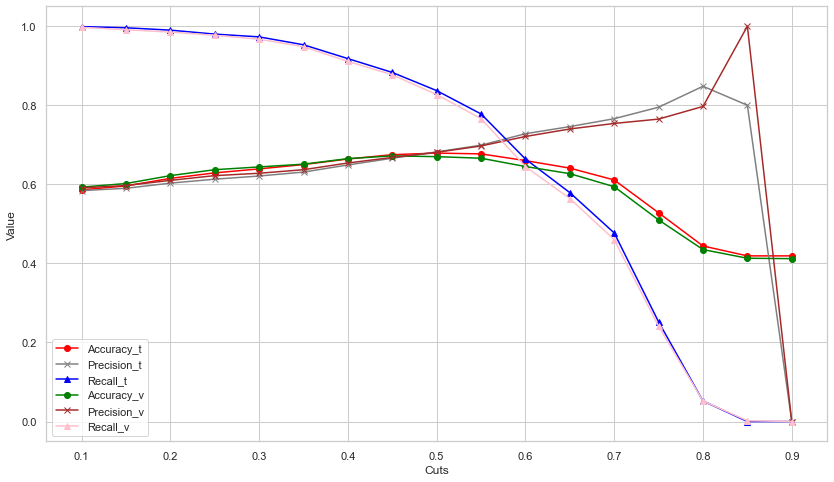

In [109]:
from matplotlib import pyplot as plt

plt.figure(figsize=(14, 8))


plt.plot(cuts,acc_t,marker='o',color = 'red',label='Accuracy_t' )
plt.plot(cuts,prec_t,marker='x',color = 'gray',label='Precision_t' )
plt.plot(cuts,rec_t,marker='^',color = 'blue',label='Recall_t' )

plt.plot(cuts,acc_v,marker='o',color = 'green',label='Accuracy_v' )
plt.plot(cuts,prec_v,marker='x',color = 'brown',label='Precision_v' )
plt.plot(cuts,rec_v,marker='^',color = 'pink',label='Recall_v' )

plt.xlabel('Cuts')
plt.ylabel('Value')
plt.legend(['Accuracy_t', 'Precision_t','Recall_t','Accuracy_v', 'Precision_v','Recall_v'])
plt.show()


In [110]:
y_train_pred_m4 = model_4.predict_proba(X_train)[:,1] 

y_valid_pred_m4 = model_4.predict_proba(X_valid)[:,1]

y_test_pred_m4 = model_4.predict_proba(X_test)[:,1]

y_train_pred_m4

array([0.4288944 , 0.51527717, 0.79029995, ..., 0.57449889, 0.66225329,
       0.77102549])

In [111]:
cut = 0.45

mask_train = (y_train_pred_m4 >= cut)

y_train_pred_m4[mask_train] =1
y_train_pred_m4[~mask_train] =0

mask_valid = (y_valid_pred_m4 >= cut)

y_valid_pred_m4[mask_valid]=1
y_valid_pred_m4[~mask_valid] =0

mask_test = (y_test_pred_m4 >= cut)

y_test_pred_m4[mask_test]=1
y_test_pred_m4[~mask_test] =0

from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train_p = accuracy_score(y_train, y_train_pred_m4)
prec_train_p = precision_score(y_train, y_train_pred_m4)
rec_train_p = recall_score(y_train, y_train_pred_m4)

acc_valid_p = accuracy_score(y_valid, y_valid_pred_m4)
prec_valid_p = precision_score(y_valid, y_valid_pred_m4)
rec_valid_p = recall_score(y_valid, y_valid_pred_m4)

acc_test_p = accuracy_score(y_test, y_test_pred_m4)
prec_test_p = precision_score(y_test, y_test_pred_m4)
rec_test_p = recall_score(y_test, y_test_pred_m4)

print(f'Treino:\nAcc: {acc_train_p:.2f}, Precision: {prec_train_p:.2f}, Recall: {rec_train_p:.2f}')
print(f'Validação:\nAcc: {acc_valid_p:.2f}, Precision: {prec_valid_p:.2f}, Recall: {rec_valid_p:.2f}')

Treino:
Acc: 0.68, Precision: 0.67, Recall: 0.88
Validação:
Acc: 0.67, Precision: 0.67, Recall: 0.88


In [112]:
## COmparing the models
print("RandomForest Results")
print(f'Treino:\nAcc: {acc_train_rf:.2f}, Precision: {prec_train_rf:.2f}, Recall: {rec_train_rf:.2f}')
print(f'Validação:\nAcc: {acc_valid_rf:.2f}, Precision: {prec_valid_rf:.2f}, Recall: {rec_valid_rf:.2f}')
print("-"*40)
print("BorutaForest Results")
print(f'Treino:\nAcc: {acc_train_bf:.2f}, Precision: {prec_train_bf:.2f}, Recall: {rec_train_bf:.2f}')
print(f'Validação:\nAcc: {acc_valid_bf:.2f}, Precision: {prec_valid_bf:.2f}, Recall: {rec_valid_bf:.2f}')
print("-"*40)
print("AdaBoost Results")
print(f'Treino:\nAcc: {acc_train_ab:.2f}, Precision: {prec_train_ab:.2f}, Recall: {rec_train_ab:.2f}')
print(f'Validação:\nAcc: {acc_valid_ab:.2f}, Precision: {prec_valid_ab:.2f}, Recall: {rec_valid_ab:.2f}')
print("-"*40)
print("LightGBM Results")
print(f'Treino:\nAcc: {acc_train_lgbm:.2f}, Precision: {prec_train_lgbm:.2f}, Recall: {rec_train_lgbm:.2f}')
print(f'Validação:\nAcc: {acc_valid_lgbm:.2f}, Precision: {prec_valid_lgbm:.2f}, Recall: {rec_valid_lgbm:.2f}')
print("-"*40)
print("LightGBM_FS Results")
print(f'Treino:\nAcc: {acc_train_lgbm_fs:.2f}, Precision: {prec_train_lgbm_fs:.2f}, Recall: {rec_train_lgbm_fs:.2f}')
print(f'Validação:\nAcc: {acc_valid_lgbm_fs:.2f}, Precision: {prec_valid_lgbm_fs:.2f}, Recall: {rec_valid_lgbm_fs:.2f}')
print("-"*40)
print("LightGBM_GS Results")
print(f'Treino:\nAcc: {acc_train_lgbm_gs:.2f}, Precision: {prec_train_lgbm_gs:.2f}, Recall: {rec_train_lgbm_gs:.2f}')
print(f'Validação:\nAcc: {acc_valid_lgbm_gs:.2f}, Precision: {prec_valid_lgbm_gs:.2f}, Recall: {rec_valid_lgbm_gs:.2f}')
print("-"*40)
print("RandomForest GridSearch")
print(f'Treino:\nAcc: {acc_train_rf_gs:.2f}, Precision: {prec_train_rf_gs:.2f}, Recall: {rec_train_rf_gs:.2f}')
print(f'Validação:\nAcc: {acc_valid_rf_gs:.2f}, Precision: {prec_valid_rf_gs:.2f}, Recall: {rec_valid_rf_gs:.2f}')
print("-"*40)
print("RandomForest GridSearch 0.45 cut Proba")
print(f'Treino:\nAcc: {acc_train_p:.2f}, Precision: {prec_train_p:.2f}, Recall: {rec_train_p:.2f}')
print(f'Validação:\nAcc: {acc_valid_p:.2f}, Precision: {prec_valid_p:.2f}, Recall: {rec_valid_p:.2f}')

RandomForest Results
Treino:
Acc: 0.65, Precision: 0.64, Recall: 0.93
Validação:
Acc: 0.65, Precision: 0.64, Recall: 0.93
----------------------------------------
BorutaForest Results
Treino:
Acc: 0.67, Precision: 0.66, Recall: 0.90
Validação:
Acc: 0.66, Precision: 0.65, Recall: 0.89
----------------------------------------
AdaBoost Results
Treino:
Acc: 0.67, Precision: 0.67, Recall: 0.84
Validação:
Acc: 0.67, Precision: 0.67, Recall: 0.85
----------------------------------------
LightGBM Results
Treino:
Acc: 0.69, Precision: 0.74, Recall: 0.72
Validação:
Acc: 0.64, Precision: 0.70, Recall: 0.69
----------------------------------------
LightGBM_FS Results
Treino:
Acc: 0.67, Precision: 0.73, Recall: 0.70
Validação:
Acc: 0.65, Precision: 0.71, Recall: 0.69
----------------------------------------
LightGBM_GS Results
Treino:
Acc: 0.68, Precision: 0.68, Recall: 0.84
Validação:
Acc: 0.67, Precision: 0.68, Recall: 0.83
----------------------------------------
RandomForest GridSearch
Treino:


# SO now that we have finded our best results we will use the test dataset to see if it matches our needs.

In [119]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(15262, 16)
(3053, 16)
(2036, 16)
(15262,)
(3053,)
(2036,)


In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("-"*40)
print("LightGBM_GS Results")
print(f'Treino:\nAcc: {acc_train_lgbm_gs:.2f}, Precision: {prec_train_lgbm_gs:.2f}, Recall: {rec_train_lgbm_gs:.2f}')
print(f'Validação:\nAcc: {acc_valid_lgbm_gs:.2f}, Precision: {prec_valid_lgbm_gs:.2f}, Recall: {rec_valid_lgbm_gs:.2f}')
print(f'Test:\nAcc: {acc_test_lgbm_gs:.2f}, Precision: {prec_test_lgbm_gs:.2f}, Recall: {rec_test_lgbm_gs:.2f}')

print("-"*40)
print("RandomForest GridSearch")
print(f'Treino:\nAcc: {acc_train_rf_gs:.2f}, Precision: {prec_train_rf_gs:.2f}, Recall: {rec_train_rf_gs:.2f}')
print(f'Validação:\nAcc: {acc_valid_rf_gs:.2f}, Precision: {prec_valid_rf_gs:.2f}, Recall: {rec_valid_rf_gs:.2f}')
print(f'Test:\nAcc: {acc_test_rf_gs:.2f}, Precision: {prec_test_rf_gs:.2f}, Recall: {rec_test_rf_gs:.2f}')

print("-"*40)
print("RandomForest GridSearch 0.45 cut Proba")
print(f'Treino:\nAcc: {acc_train_p:.2f}, Precision: {prec_train_p:.2f}, Recall: {rec_train_p:.2f}')
print(f'Validação:\nAcc: {acc_valid_p:.2f}, Precision: {prec_valid_p:.2f}, Recall: {rec_valid_p:.2f}')
print(f'Test:\nAcc: {acc_test_p:.2f}, Precision: {prec_test_p:.2f}, Recall: {rec_test_p:.2f}')

----------------------------------------
LightGBM_GS Results
Treino:
Acc: 0.68, Precision: 0.68, Recall: 0.84
Validação:
Acc: 0.67, Precision: 0.68, Recall: 0.83
Test:
Acc: 0.68, Precision: 0.70, Recall: 0.83
----------------------------------------
RandomForest GridSearch
Treino:
Acc: 0.69, Precision: 0.68, Recall: 0.87
Validação:
Acc: 0.67, Precision: 0.67, Recall: 0.86
Test:
Acc: 0.69, Precision: 0.70, Recall: 0.86
----------------------------------------
RandomForest GridSearch 0.45 cut Proba
Treino:
Acc: 0.68, Precision: 0.67, Recall: 0.88
Validação:
Acc: 0.67, Precision: 0.67, Recall: 0.88
Test:
Acc: 0.68, Precision: 0.69, Recall: 0.88


# The final conclusion is that the best model for the way I decided to deal with the dataset was the RandomForest using gridsearch.
# There are several other things we could do, hyperparams we could add on our gridsearch and other different ways to deal with NaN values.
# For now looks like i had here is a nice result and had lot of fun.